In [1]:
%matplotlib notebook

import sys
import os
import logging
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.path as path
import matplotlib.patches as patches

from astropy.modeling import models, fitting

sys.path.append("../DesignTool")
sys.path.append("../DesignTool/smdtLibs/")

from configFile import ConfigFile, getDefaultConfig
from targets import TargetList
from inOutChecker import InOutChecker
from maskDesignFile import (
    MaskDesignOutputFitsFile,
    outputAsList,
    MaskDesignInputFitsFile,
)
import maskLayouts
from slitmaskDesignTool import SlitmaskDesignTool

import utils
from testSlitMask import TestSlitmask, testMaskDesign
from DistortionUtil import projectTargetXYs
from drawUtils import drawPatch
from diffSlitMask import DiffSlitMask
from Test_All import Test_Inputs

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
logging.disable()

<IPython.core.display.Javascript object>

In [4]:
# File1 = "../DeimosExamples/EvanKirby/n2419c.fits"
# File2 = "../DeimosExamples/EvanKirby/n2419c_test.fits"
File1 = "../DeimosExamples/EvanKirby/LeoIa.fits"
File2 = "../DeimosExamples/EvanKirby/LeoIa_test.fits"

<IPython.core.display.Javascript object>

In [5]:
diffTest = DiffSlitMask(File1, File2)

<IPython.core.display.Javascript object>

(0       28.095459
1      -84.735607
2     -150.754325
3     -117.379365
4      -76.428572
          ...    
132    270.222170
133    -65.545615
134     52.201862
135    170.488786
136   -174.712931
Length: 137, dtype: float64, 0      159.237683
1      108.484526
2       98.669192
3       31.744999
4       77.850411
          ...    
132    101.846091
133    129.958492
134    132.689497
135    159.250210
136     47.713697
Length: 137, dtype: float64)


<IPython.core.display.Javascript object>


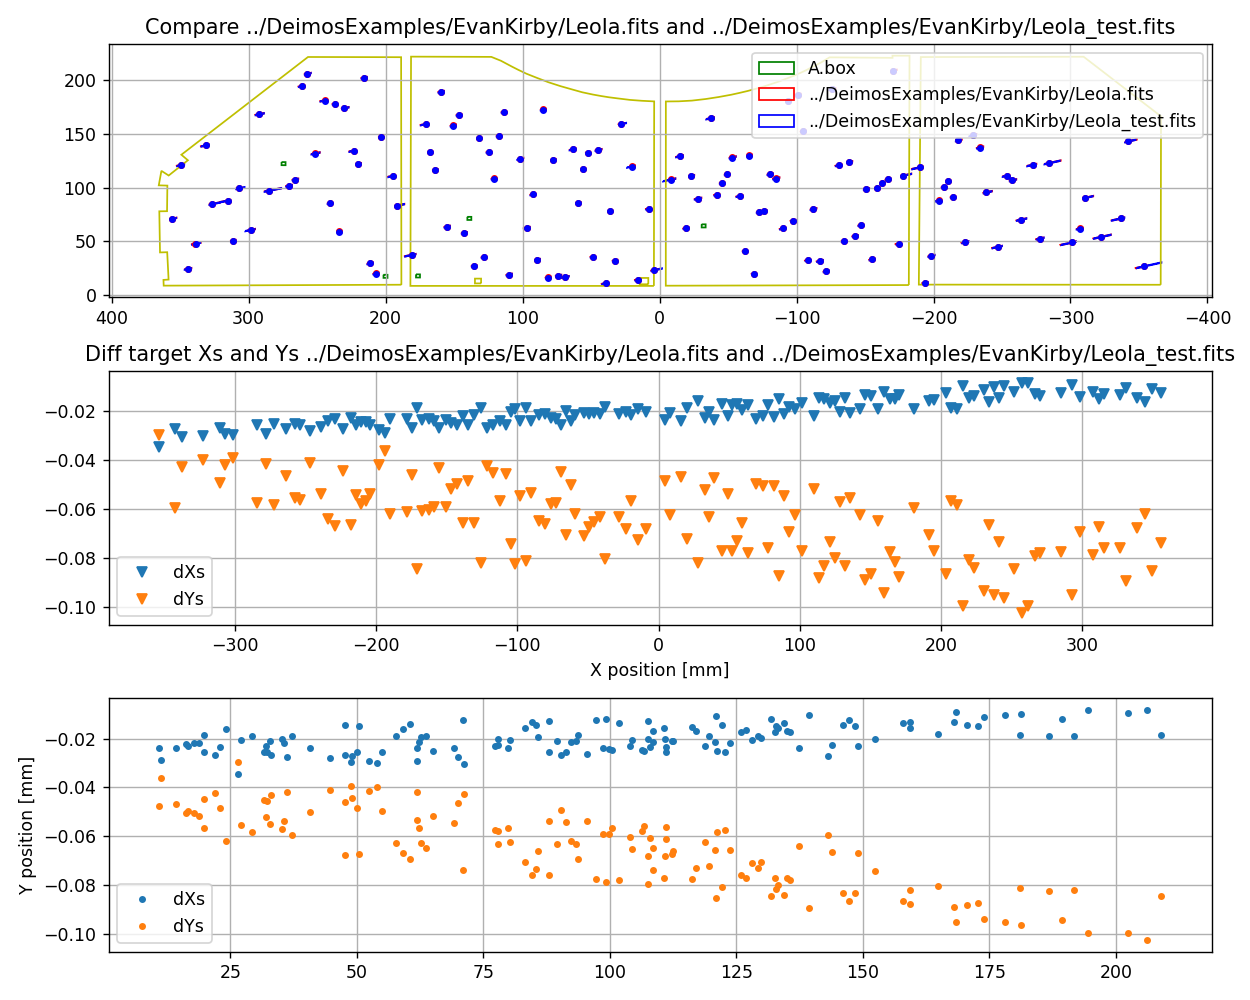

<IPython.core.display.Javascript object>

In [6]:
diffs = diffTest.calcDiffs()
print(diffTest.target2XYs)
diffTest.plotDiffs(diffs)

In [7]:
xs2, ys2 = diffTest.target2XYs
xs1, ys1 = diffTest.target1XYs

<IPython.core.display.Javascript object>

In [8]:
plist = ["pcode", "OBJECT", "slitX1_x", "slitY1_x", "slitX1_y"]
slits = diffTest.joinedSlits
slits = slits[slits.pcode > 0]
slits[np.isnan(slits.slitX1_y)][plist], xs2[np.isnan(xs2)]

(Empty DataFrame
 Columns: [pcode, OBJECT, slitX1_x, slitY1_x, slitX1_y]
 Index: [],
 Series([], dtype: float64))

<IPython.core.display.Javascript object>

In [9]:
pdeg = 4
model0 = models.Polynomial2D(degree=1)
xfitter = fitting.LinearLSQFitter()
yfitter = fitting.LinearLSQFitter()

xfitted = xfitter(model0, xs2, ys2, xs1)
yfitted = yfitter(model0, xs2, ys2, ys1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


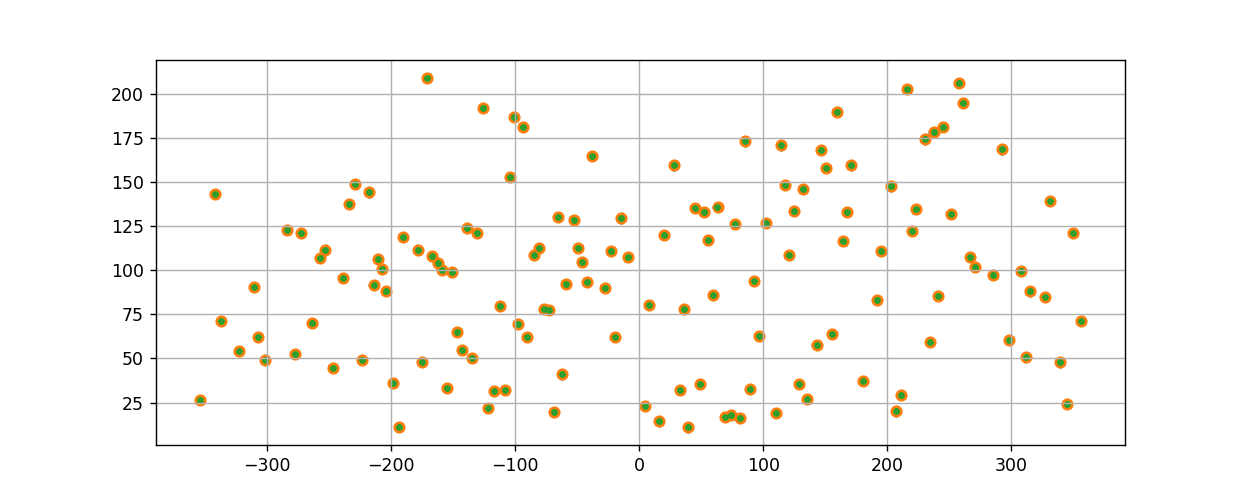

<IPython.core.display.Javascript object>

In [10]:
plt.figure(figsize=(10, 4))
plt.scatter(xs2, ys2, marker="+")
plt.scatter(xs1, ys1, marker="o")
plt.scatter(xfitted(xs2, ys2), yfitted(xs2, ys2), marker=".")
plt.grid()

In [11]:
print(list(zip(xfitted.param_names, xfitted.parameters)))
print(list(zip(yfitted.param_names, yfitted.parameters)))

[('c0_0', 0.024862042750116133), ('c1_0', 0.9999760184387639), ('c0_1', -4.888209674334636e-05)]
[('c0_0', 0.042326410191973814), ('c1_0', 4.501003381102105e-05), ('c0_1', 1.0002374583551263)]


<IPython.core.display.Javascript object>

In [12]:
np.std(xs1 - xfitted(xs2, ys2)), np.std(ys1 - yfitted(xs2, ys2))

(0.0004834734323602185, 0.0006605326276034533)

<IPython.core.display.Javascript object>

In [13]:
np.std(xs1 - xs2), np.std(ys1 - ys2)

(0.005481259578336351, 0.015618559147656742)

<IPython.core.display.Javascript object>

In [14]:
0.9998 * 0.99979

0.999590042

<IPython.core.display.Javascript object>